In [42]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [43]:
train_set = pd.read_csv('./competition_data/train_set.csv', parse_dates=['quote_date'])

In [44]:
print train_set.shape
print train_set.dtypes
print train_set.sample(10, random_state=0)

(30213, 8)
tube_assembly_id              object
supplier                      object
quote_date            datetime64[ns]
annual_usage                   int64
min_order_quantity             int64
bracket_pricing               object
quantity                       int64
cost                         float64
dtype: object
      tube_assembly_id supplier quote_date  annual_usage  min_order_quantity  \
9730          TA-05679   S-0066 2013-08-04             0                   0   
7442          TA-04183   S-0066 2013-10-01             0                   0   
19179         TA-13388   S-0054 2009-05-26             1                   0   
9565          TA-05576   S-0072 2002-08-30            88                   1   
718           TA-00338   S-0066 2013-07-01             0                   0   
14127         TA-08815   S-0058 2008-12-01           129                  35   
252           TA-00108   S-0066 2013-10-01             0                   0   
990           TA-00497   S-0066 2013-09

In [45]:
train_set.groupby('bracket_pricing').count()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,quantity,cost
bracket_pricing,,,,,,,
No,3930,3930,3930,3930,3930,3930,3930
Yes,26283,26283,26283,26283,26283,26283,26283


In [65]:
train_set['year'] = train_set.quote_date.apply(lambda x : x.year)
train_set['month'] = train_set.quote_date.apply(lambda x : x.month)
train_set.drop(['quote_date'], axis=1, inplace=True)
# train_set['quantity_rep'] = train_set.quantity.apply(lambda x : 1.0 / x)

In [66]:
train_set.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month
0,TA-00002,S-0066,0,0,Yes,1,21.905933,2013,7
1,TA-00002,S-0066,0,0,Yes,2,12.341214,2013,7
2,TA-00002,S-0066,0,0,Yes,5,6.601826,2013,7
3,TA-00002,S-0066,0,0,Yes,10,4.687770,2013,7
4,TA-00002,S-0066,0,0,Yes,25,3.541561,2013,7


#Output file

In [68]:
train_set.to_csv('train_set_ym.csv', index=False)

# -----

In [7]:
train_set_dummies = pd.get_dummies(train_set, columns=['supplier', 'bracket_pricing'])
train_set_dummies = train_set_dummies.drop(['bracket_pricing_No'], axis=1)

In [8]:
train_set_dummies.head()

,tube_assembly_id,quote_date,annual_usage,min_order_quantity,quantity,cost,year,quantity_rep,supplier_S-0003,supplier_S-0004,...,supplier_S-0096,supplier_S-0097,supplier_S-0104,supplier_S-0105,supplier_S-0106,supplier_S-0107,supplier_S-0108,supplier_S-0109,supplier_S-0111,bracket_pricing_Yes
0,TA-00002,2013-07-07,0,0,1,21.905933,2013,1.00,0,0,...,0,0,0,0,0,0,0,0,0,1
1,TA-00002,2013-07-07,0,0,2,12.341214,2013,0.50,0,0,...,0,0,0,0,0,0,0,0,0,1
2,TA-00002,2013-07-07,0,0,5,6.601826,2013,0.20,0,0,...,0,0,0,0,0,0,0,0,0,1
3,TA-00002,2013-07-07,0,0,10,4.687770,2013,0.10,0,0,...,0,0,0,0,0,0,0,0,0,1
4,TA-00002,2013-07-07,0,0,25,3.541561,2013,0.04,0,0,...,0,0,0,0,0,0,0,0,0,1


#Output file

In [9]:
# train_set_dummies.to_csv('train_set_adjusted.csv', index=False)

# -----

In [10]:
# train_set_no_date = train_set.drop(['quote_date'], axis=1)

In [11]:
# train_set_no_date_dummies = pd.get_dummies(train_set_no_date, columns=['supplier', 'bracket_pricing'])

In [12]:
# train_set_no_date_dummies_drop_bracket_n = \
# train_set_no_date_dummies.drop(['bracket_pricing_No'], axis=1)

In [13]:
# train_set_no_date_dummies_drop_bracket_n.to_csv('train_set_no_date_dummies_drop_bracket_n.csv', index=False)

In [14]:
train_set_no_bracket = train_set[train_set.bracket_pricing == 'No']

In [23]:
train_set_no_bracket.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,quantity_rep
32,TA-00013,S-0026,1992-07-21,50,1,No,1,10.004284,1992,1
41,TA-00021,S-0030,2014-02-10,1,1,No,1,3.433061,2014,1
42,TA-00022,S-0013,2011-07-27,1,1,No,1,8.563178,2011,1
59,TA-00027,S-0062,1993-09-24,30,1,No,1,2.737546,1993,1
74,TA-00037,S-0062,1994-09-01,600,1,No,1,1.563517,1994,1


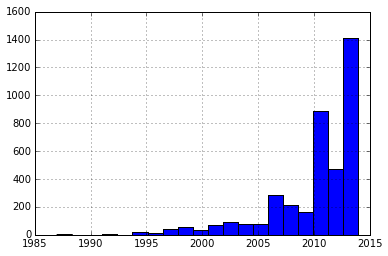

In [22]:
train_set_no_bracket.year.hist(bins=20)
plt.show()

In [18]:
train_set_yes_bracket = train_set[train_set.bracket_pricing == 'Yes']

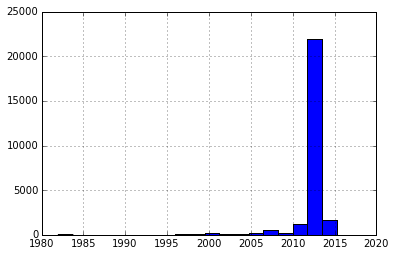

In [21]:
train_set_yes_bracket.year.hist(bins=20)
plt.show()

In [41]:
pd.pivot_table(train_set, index='bracket_pricing', aggfunc='count')

,annual_usage,cost,min_order_quantity,quantity,quantity_rep,quote_date,supplier,tube_assembly_id,year
bracket_pricing,,,,,,,,,
No,3930,3930,3930,3930,3930,3930,3930,3930,3930
Yes,26283,26283,26283,26283,26283,26283,26283,26283,26283


In [40]:
pd.value_counts(train_set_no_bracket.supplier)

S-0066    790
S-0072    782
S-0041    624
S-0013    505
S-0026    470
S-0058    126
S-0064    106
S-0062    102
S-0104     90
S-0030     87
S-0081     41
S-0105     32
S-0014     23
S-0005     23
S-0031     15
S-0070     14
S-0043     14
S-0027     10
S-0092      8
S-0054      7
S-0015      5
S-0042      5
S-0007      5
S-0011      4
S-0023      4
S-0009      4
S-0025      3
S-0060      3
S-0059      2
S-0061      2
S-0111      2
S-0107      2
S-0078      2
S-0096      2
S-0074      1
S-0087      1
S-0022      1
S-0024      1
S-0029      1
S-0095      1
S-0012      1
S-0051      1
S-0068      1
S-0109      1
S-0108      1
S-0004      1
S-0106      1
S-0006      1
S-0003      1
S-0046      1
dtype: int64

In [39]:
pd.value_counts(train_set_yes_bracket.supplier)

S-0066    19763
S-0041     2699
S-0072     1535
S-0054      831
S-0058      390
S-0064      340
S-0026      257
S-0062      162
S-0014      116
S-0013       49
S-0030       24
S-0081       23
S-0042       14
S-0018       10
S-0027       10
S-0080       10
S-0056        9
S-0008        7
S-0031        6
S-0050        5
S-0070        4
S-0074        4
S-0090        3
S-0097        3
S-0092        2
S-0059        2
S-0005        1
S-0087        1
S-0105        1
S-0046        1
S-0011        1
dtype: int64